In [3]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import glob
import pickle as pkl
import os


pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
MREGIONS = {'WAf' : [[-18,25,4,25], 'spac', 0, (1,7), (8,12), (1,12)], # last is hourly offset to UCT # 12    # [-18,25,4,25]
 'SAf' : [[20,35, -35,-15], 'spac', 2, (9,12), (1,5), (1,12)], # 10
 'india' : [[70,90, 5,30], 'asia', 5, (1,7), (8,12), (1,12)], # 7
 'china' : [[105,115,25,40], 'asia', 8 , (1,7), (8,12), (1,12)], # 4
 'australia' : [[120,140,-23, -11], 'asia', 9, (10,12), (1,5), (1,12)], # 3
 'sub_SA' : [[-68,-47, -40, -20.5], 'spac', -4, (9,12), (1,5), (1,12)] , # 16
# 'trop_SA' : [[-75, -50, -20, -5], 'spac', -5, (1,12), (1,12), (1,12)], # 17
 'GPlains' : [[-100,-90,32,47], 'nam', -6, (1,7), (8,12), (1,12)] # # 18

}

In [5]:
rdics = {}
for regs in MREGIONS.keys():
    for ids, y in enumerate(range(2000,2018)):
        test = pd.read_csv('/media/ck/LStorage/save_files/'+regs+'_initTime__mcs_tracks_extc_'+str(y)+'0101_'+str(y)+'1231.csv')
        if ids == 0:
            test2 = pd.DataFrame(test)
        else :
            test2 = pd.concat([test2, test])
    rdics[regs] = test2

In [6]:
rdics['GPlains']

,length,mcs_length,mcs_type,starttrackresult,endtrackresult,base_time,mcs_status,meanlat,meanlon,core_area,...,month,hour,minute,tracktime,trackid,londiff_loc-init,latdiff_loc-init,init_lon,init_lat,init_hour
0,12.0,NaN,1,10.0,0.0,2000-06-01 19:30:00,0.0,44.061386,-91.175310,1100.0,...,6,19,30,0,8,0.000000,0.000000,-91.175308,44.061386,19
1,12.0,NaN,1,10.0,0.0,2000-06-01 20:30:00,0.0,44.353490,-90.392845,18200.0,...,6,20,30,1,8,0.782463,0.292103,-91.175308,44.061386,19
2,12.0,NaN,1,10.0,0.0,2000-06-01 21:30:00,1.0,44.564423,-88.997190,49500.0,...,6,21,30,2,8,2.178116,0.503036,-91.175308,44.061386,19
3,12.0,NaN,1,10.0,0.0,2000-06-01 22:30:00,1.0,44.469677,-88.656906,80400.0,...,6,22,30,3,8,2.518402,0.408291,-91.175308,44.061386,19
4,12.0,NaN,1,10.0,0.0,2000-06-01 23:30:00,1.0,44.210155,-88.046585,120600.0,...,6,23,30,4,8,3.128723,0.148769,-91.175308,44.061386,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,35.0,NaN,1,2.0,12.0,2017-12-20 17:30:00,1.0,35.932922,-79.036545,199900.0,...,12,17,30,30,2973,19.920692,3.732784,-98.957237,32.200138,11
2304,35.0,NaN,1,2.0,12.0,2017-12-20 18:30:00,1.0,35.329070,-80.035640,141200.0,...,12,18,30,31,2973,18.921600,3.128933,-98.957237,32.200138,11
2305,35.0,NaN,1,2.0,12.0,2017-12-20 19:30:00,1.0,34.892277,-78.784430,125000.0,...,12,19,30,32,2973,20.172806,2.692139,-98.957237,32.200138,11
2306,35.0,NaN,1,2.0,12.0,2017-12-20 20:30:00,1.0,34.280552,-78.068180,94700.0,...,12,20,30,33,2973,20.889061,2.080414,-98.957237,32.200138,11


<AxesSubplot:ylabel='Frequency'>

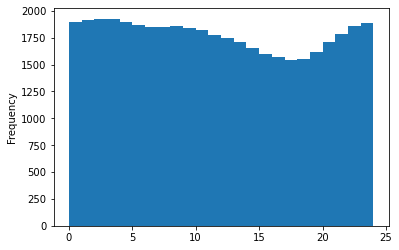

In [46]:
(rdics['GPlains'])['hour'].plot.hist(bins=range(0,25))

In [55]:
((rdics['china'])[(rdics['china']['trackresult']==10) & (rdics['china']['mcs_status']==0)])['ccs_area'].min()

900.0

<AxesSubplot:ylabel='Frequency'>

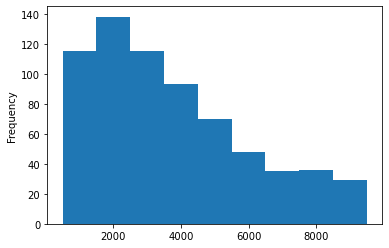

In [53]:
((rdics['china'])[(rdics['china']['trackresult']==10) & (rdics['china']['mcs_status']==0)])['ccs_area'].plot.hist(bins=range(500,10000,1000))

In [10]:
from utils import u_statistics as u_stats

18
16
13
10
9
22
24


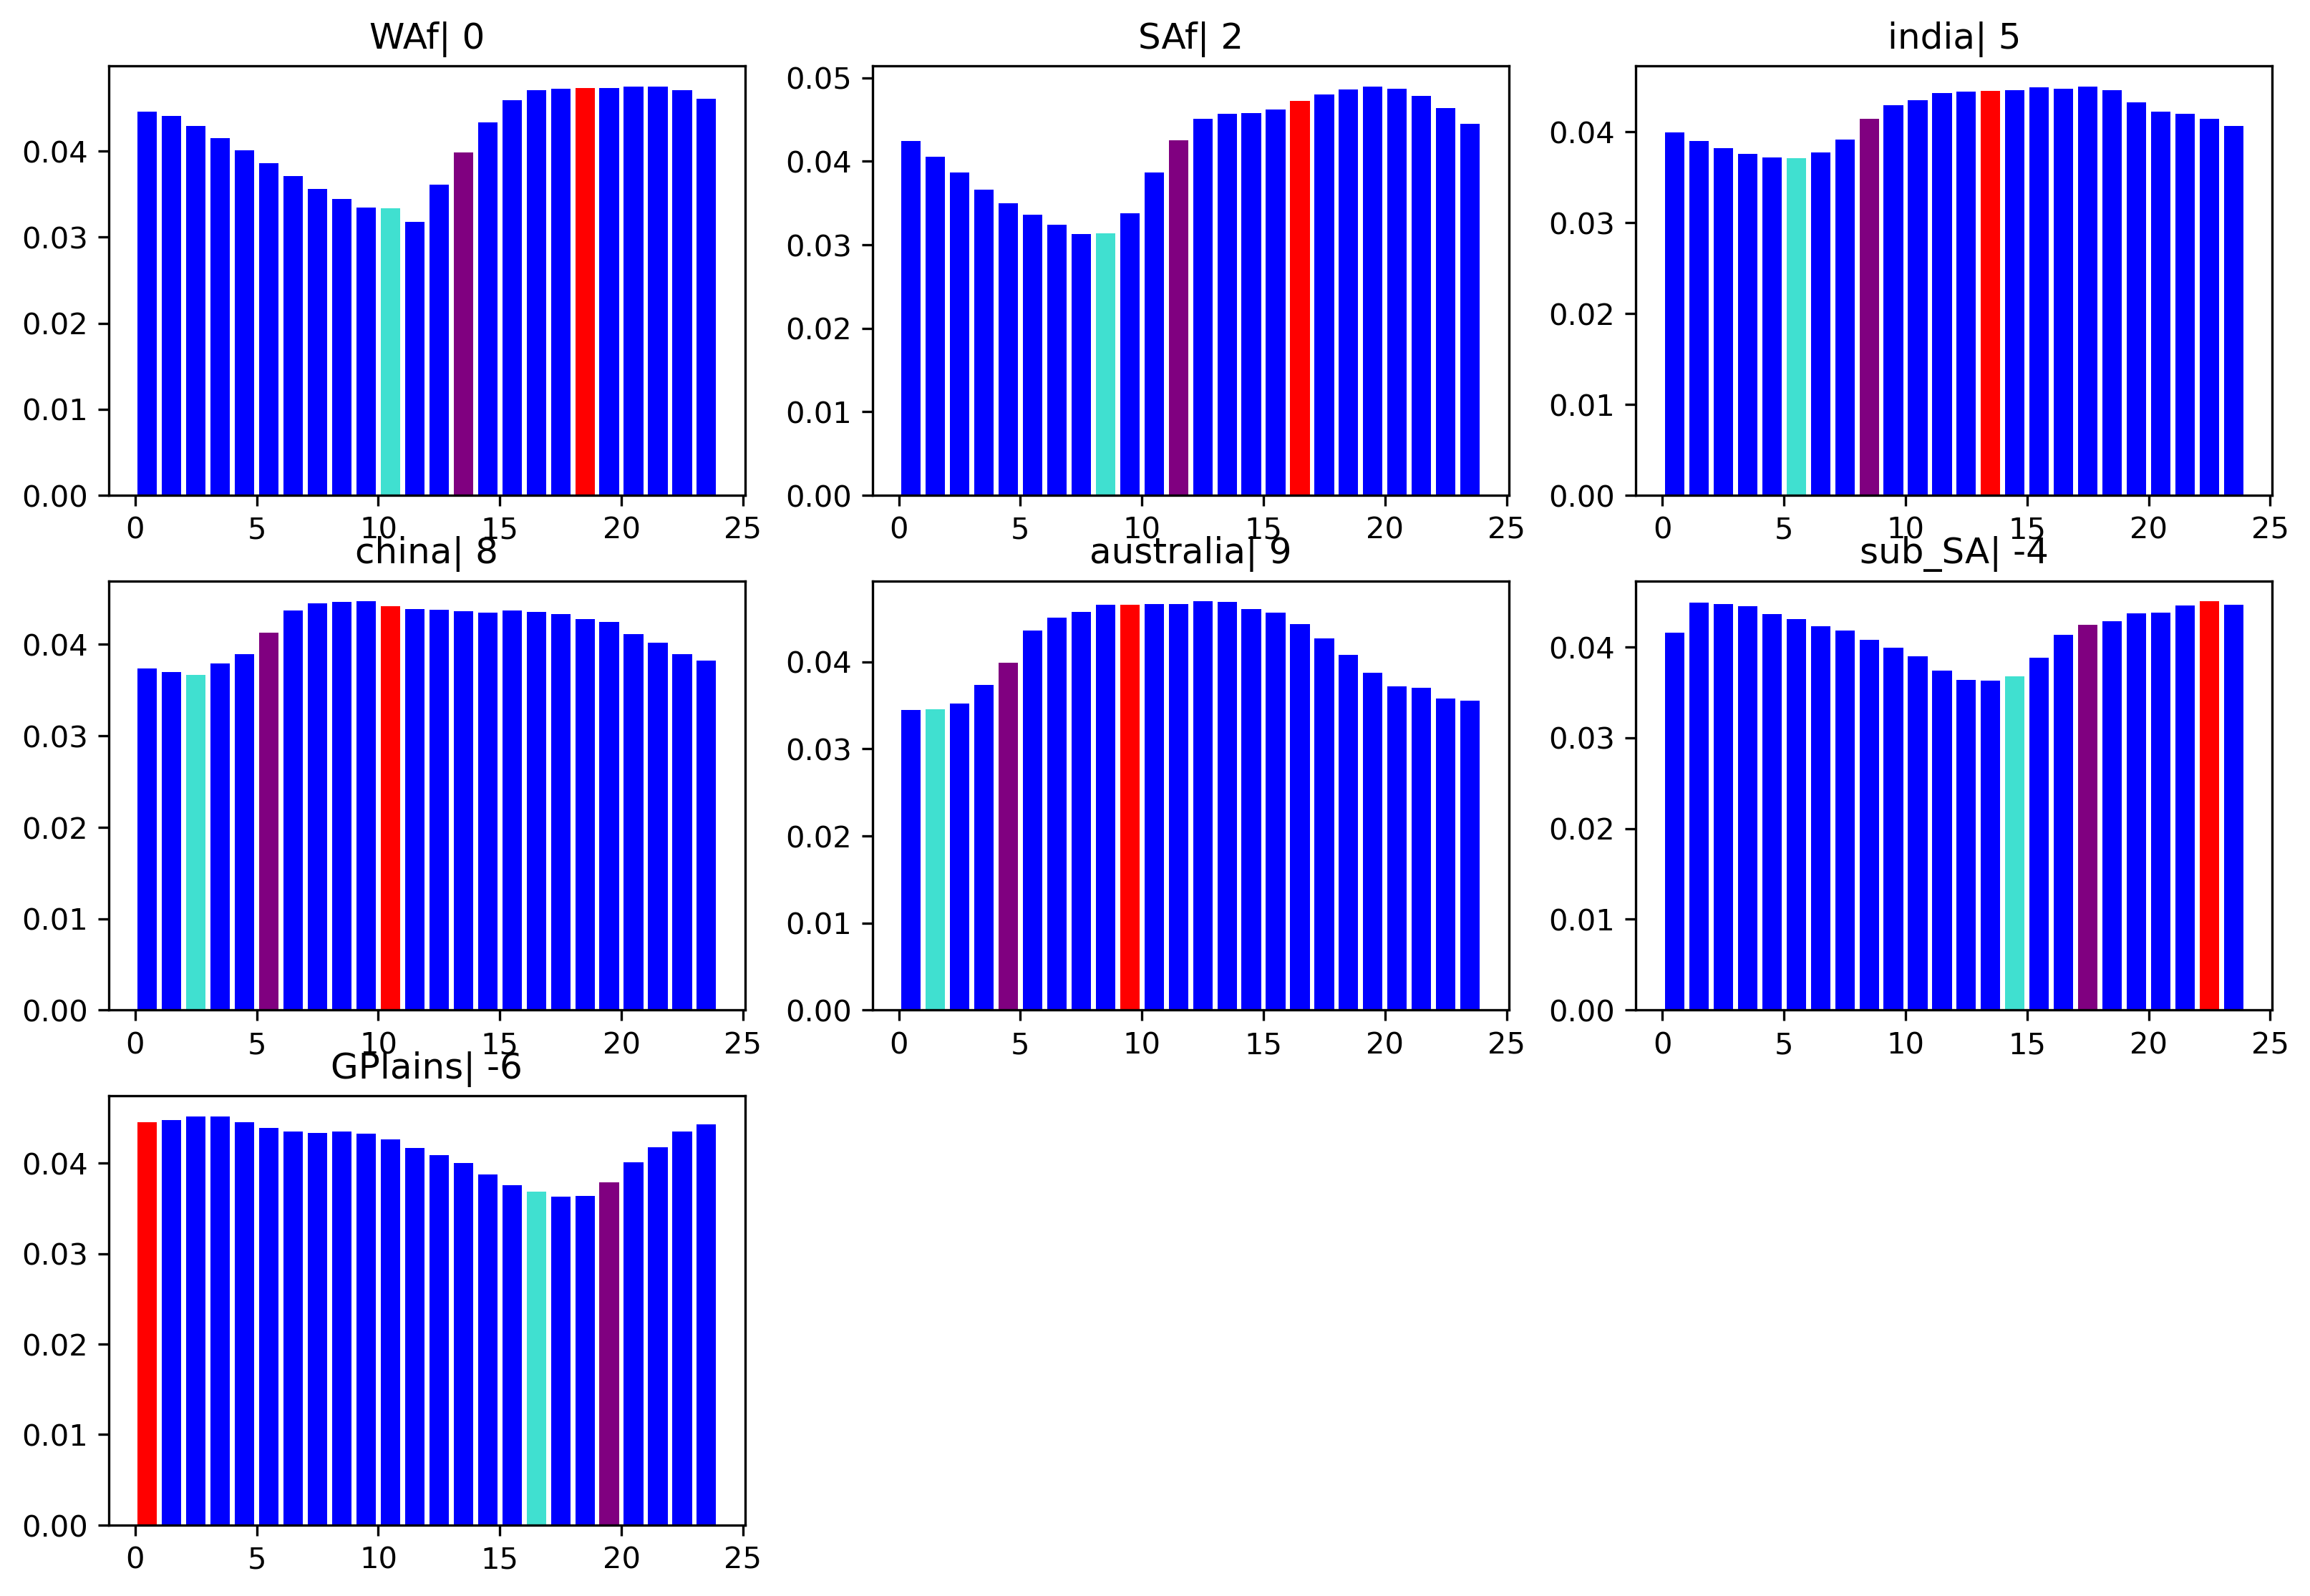

In [11]:
f= plt.figure(figsize=(13,9), dpi=300)
for ids, regs in enumerate(MREGIONS.keys()):
    ax = f.add_subplot(3,3,ids+1)
    
    pick = rdics[regs]
    hist_freq, hist_count, bin_edge = u_stats.histo_frequency(pick['hour'], bins=np.arange(0,25))
    #print(np.unique(pick['hour']))
    mid_bin = bin_edge[0:-1] + (bin_edge[1::]-bin_edge[0:-1])/2
    #m_bin = mid_bin - (MREGIONS[regs])[2]
    #print(mid_bin)
    colors = ['b']*24
    ispos = int(np.where(mid_bin==18.5)[0])
    secpos = int(np.where(mid_bin==13.5)[0])
    firstpos = int(np.where(mid_bin==10.5)[0])
    #minpos = ispos-(MREGIONS[regs])[2]
    #ipdb.set_trace()
    minpos = ispos-(MREGIONS[regs])[2]
    miinpos = firstpos - (MREGIONS[regs])[2]
    miiinpos = secpos - (MREGIONS[regs])[2]
    print(minpos)
    if minpos == 24:
        minpos=0
    
    colors[minpos] = 'r'  # 1800
    colors[miinpos] = 'turquoise' # 1100
    colors[miiinpos] = 'purple' # 1400
    ax.bar(mid_bin,hist_freq, align='center', color=colors)
    ax.set_title(regs + '| '+str((MREGIONS[regs])[2]))


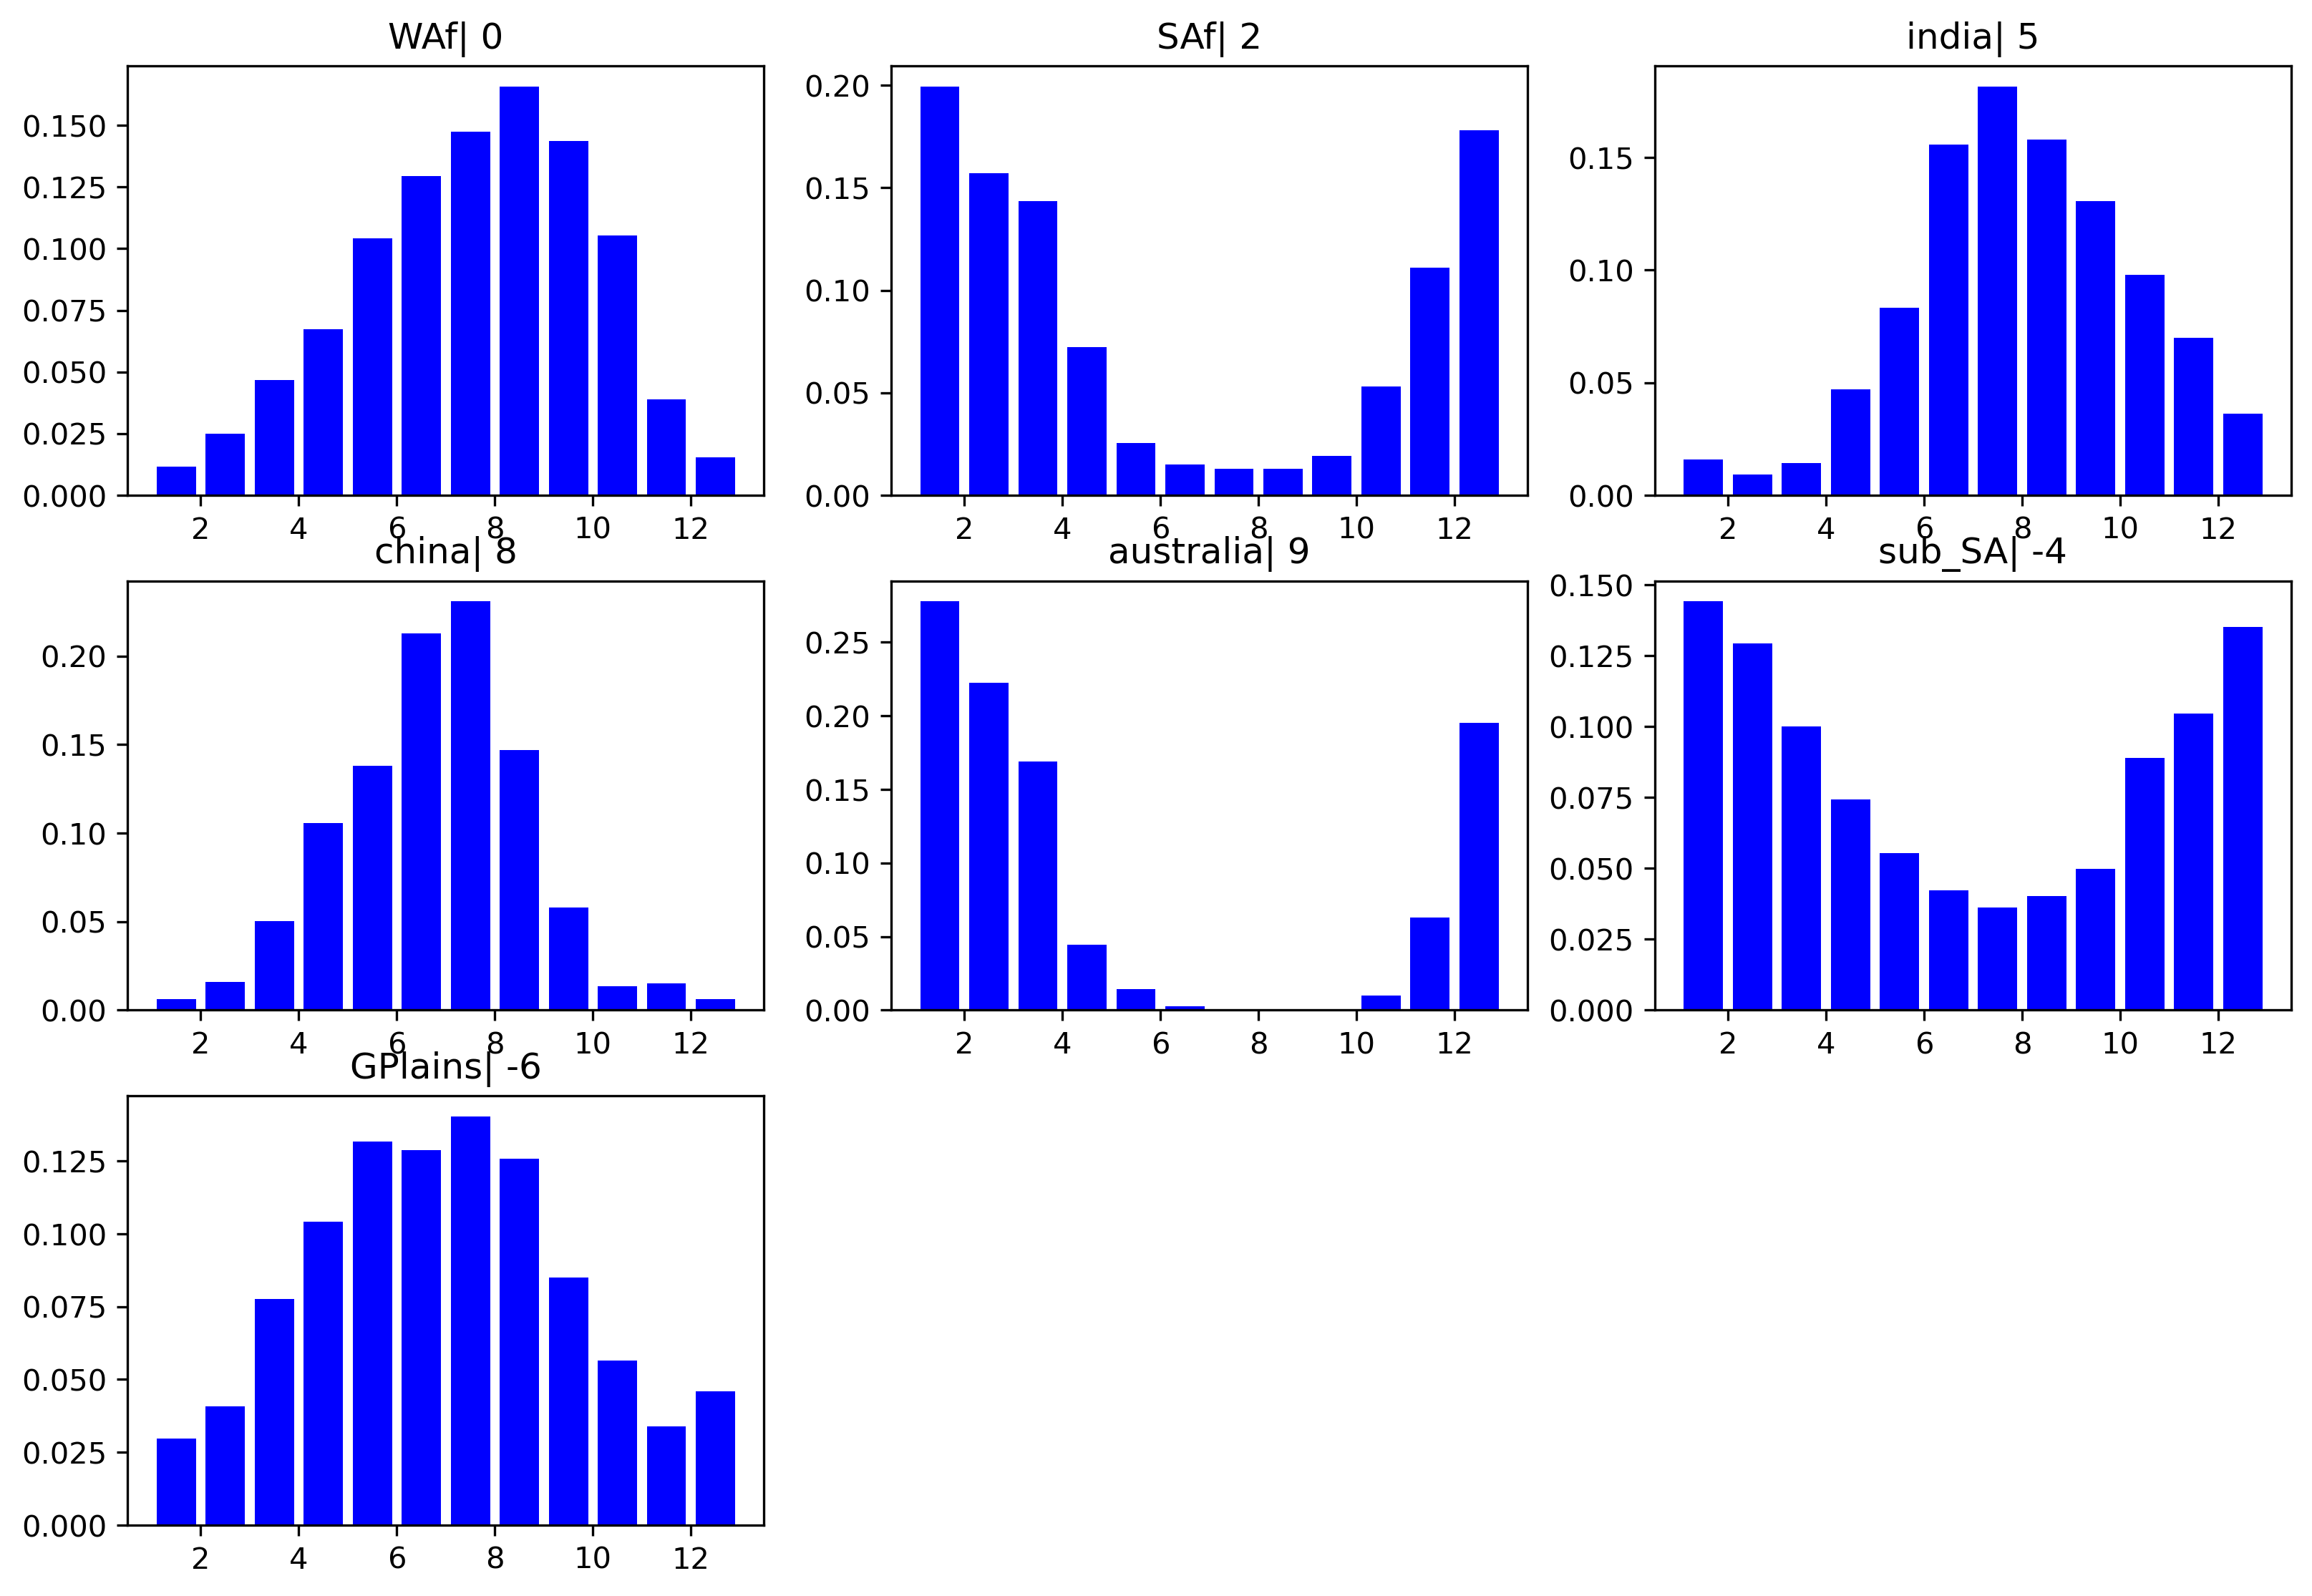

In [12]:
f= plt.figure(figsize=(13,9), dpi=300)
for ids, regs in enumerate(MREGIONS.keys()):
    ax = f.add_subplot(3,3,ids+1)
    
    pick = rdics[regs]
    hist_freq, hist_count, bin_edge = u_stats.histo_frequency(pick['month'], bins=np.arange(1,14))
    #print(np.unique(pick['hour']))
    mid_bin = bin_edge[0:-1] + (bin_edge[1::]-bin_edge[0:-1])/2
    #m_bin = mid_bin - (MREGIONS[regs])[2]
    #print(mid_bin)
    colors = ['b']*24
#     ispos = int(np.where(mid_bin==18.5)[0])
#     secpos = int(np.where(mid_bin==13.5)[0])
#     firstpos = int(np.where(mid_bin==10.5)[0])
#     #minpos = ispos-(MREGIONS[regs])[2]
#     #ipdb.set_trace()
#     minpos = ispos-(MREGIONS[regs])[2]
#     miinpos = firstpos - (MREGIONS[regs])[2]
#     miiinpos = secpos - (MREGIONS[regs])[2]
#     print(minpos)
#     if minpos == 24:
#         minpos=0
    
#     colors[minpos] = 'r'
#     colors[miinpos] = 'turquoise'
#     colors[miiinpos] = 'purple'
    ax.bar(mid_bin,hist_freq, align='center', color=colors)
    ax.set_title(regs + '| '+str((MREGIONS[regs])[2]))


18
16
13
10
9
22
24


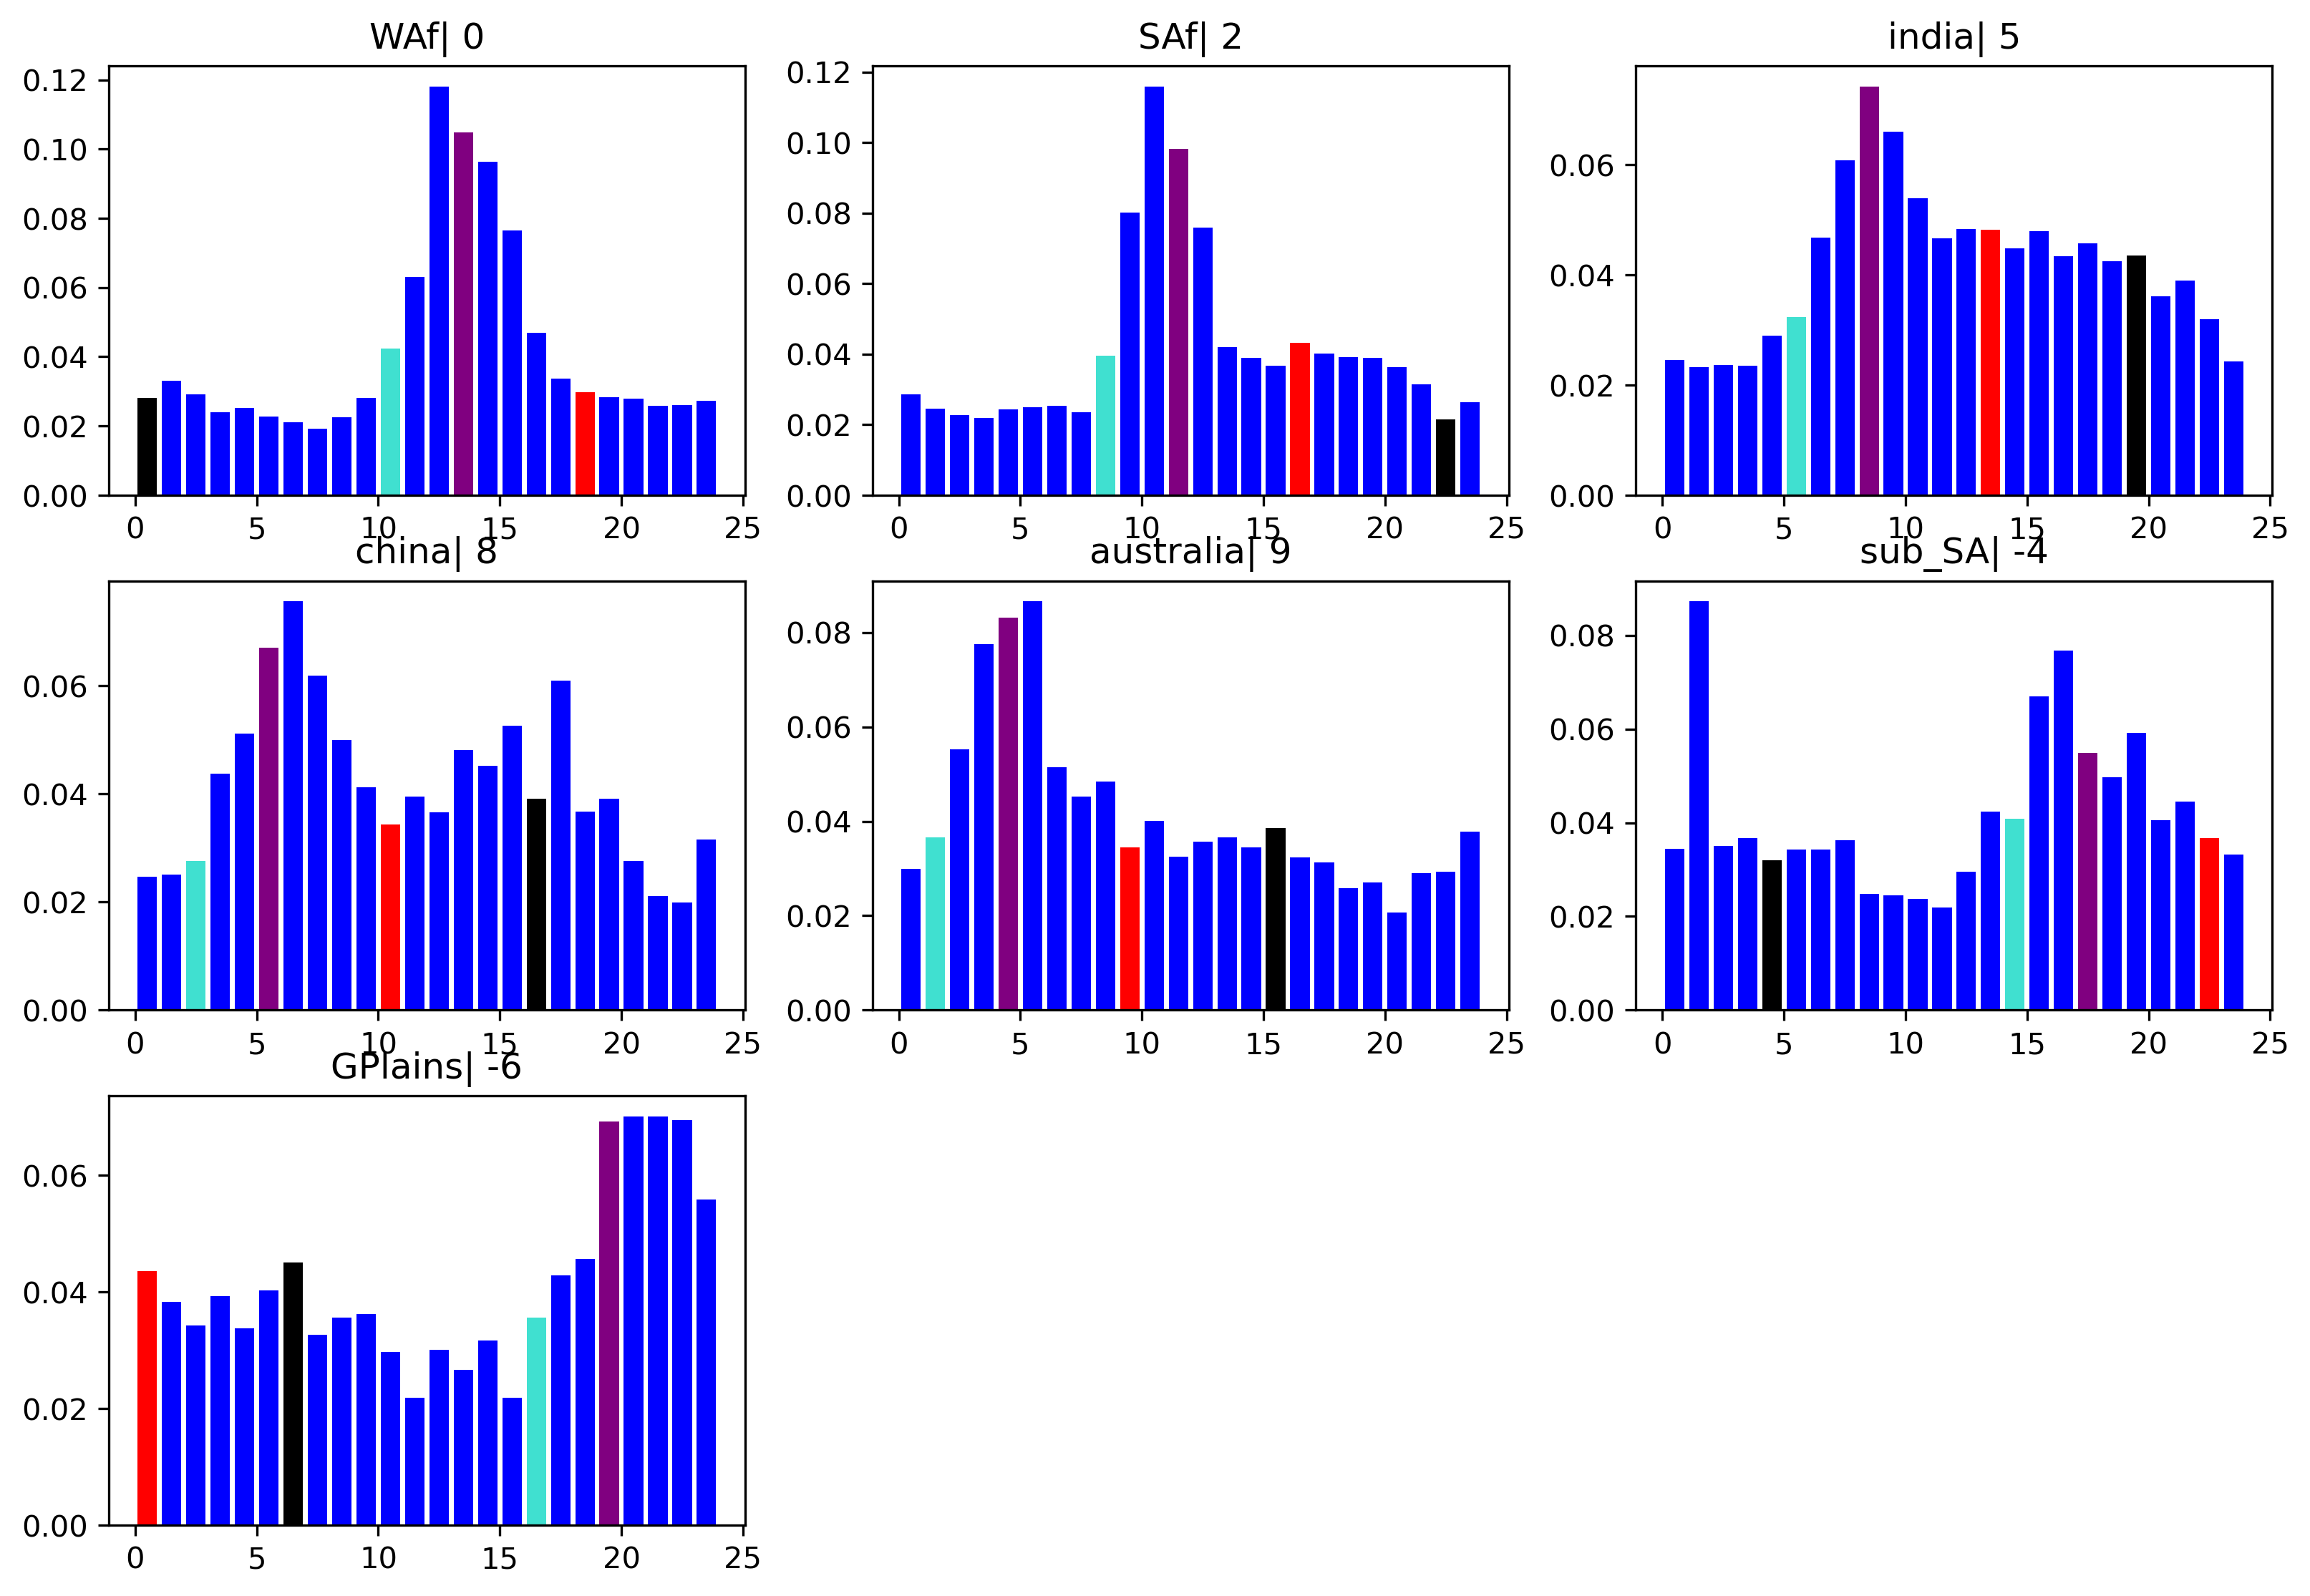

In [14]:
f= plt.figure(figsize=(13,9), dpi=300)
for ids, regs in enumerate(MREGIONS.keys()):
    ax = f.add_subplot(3,3,ids+1)
    
    pick = rdics[regs]
    hist_freq, hist_count, bin_edge = u_stats.histo_frequency(pick['init_hour'], bins=np.arange(0,25))
    #print(np.unique(pick['hour']))
    mid_bin = bin_edge[0:-1] + (bin_edge[1::]-bin_edge[0:-1])/2
    #m_bin = mid_bin - (MREGIONS[regs])[2]
    #print(mid_bin)
    colors = ['b']*24
    ispos = int(np.where(mid_bin==18.5)[0])
    secpos = int(np.where(mid_bin==13.5)[0])
    firstpos = int(np.where(mid_bin==10.5)[0])
    thirdpos = int(np.where(mid_bin==0.5)[0])
    #minpos = ispos-(MREGIONS[regs])[2]
    #ipdb.set_trace()
    minpos = ispos-(MREGIONS[regs])[2]
    miinpos = firstpos - (MREGIONS[regs])[2]
    miiinpos = secpos - (MREGIONS[regs])[2]
    midnightpos = thirdpos - (MREGIONS[regs])[2]
    print(minpos)
    if minpos == 24:
        minpos=0
    
    colors[minpos] = 'r'
    colors[miinpos] = 'turquoise'
    colors[miiinpos] = 'purple'
    colors[midnightpos] = 'k'
    ax.bar(mid_bin,hist_freq, align='center', color=colors)
    ax.set_title(regs + '| '+str((MREGIONS[regs])[2]))
